# **MOBILE PRICE PREDICTION**

In [1]:
# 1) Importing necessary Libraries 

import pandas as pd
import numpy as np

# For Data Visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import re

# Configuration
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

import warnings 
warnings.filterwarnings('ignore')

print('Libraries loaded')

Libraries loaded


In [2]:
# 2) Load dataset
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Project 4 Prediction Mobile Price\Processed_Flipdata - Processed_Flipdata.csv')
print('Data shape:', df.shape)
df.head()

Data shape: (541, 12)


,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [3]:
# Removing ',' in Prize column and converting it to float.
df['Prize'] = pd.to_numeric(df['Prize'].astype(str).str.replace(",", "", regex=False), errors="coerce")

In [4]:
# 3) Basic Overview

df.info()
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB
Missing values:
 Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor

In [5]:
# Checking numerical variable ranges
print("\nDescribe numeric features:\n")
display(df.describe())
# Checking categorical unique counts
print("\nDescribe categorical features:\n") 
display(df.describe(include=['object']))


Describe numeric features:



,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000



Describe categorical features:



,Model,Colour,Rear Camera,Front Camera,Processor_
count,541,541,541,541,541
unique,187,275,14,13,123
top,vivo Y16,Yellow,50MP,16MP,Qualcomm Snapdragon 680
freq,9,12,260,164,33


In [6]:
# Lets check the uniques
df.nunique()
#Here we can find . We have one unnecessory column. Unnamed: 0 , Lets Drop this ..

Unnamed: 0       541
Model            187
Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Prize            158
dtype: int64

In [7]:
df.drop(columns='Unnamed: 0',inplace = True)
df.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

In [8]:
# 4) FEATURE SUMMARY & STATISTICS

print("\n===== FEATURE STATISTICS =====")
display(df.describe(include='all'))


===== FEATURE STATISTICS =====


,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
count,541,541,541.000000,541.000000,541.000000,541,541,541.000000,541.000000,541,541.000000
unique,187,275,NaN,NaN,NaN,14,13,NaN,NaN,123,NaN
top,vivo Y16,Yellow,NaN,NaN,NaN,50MP,16MP,NaN,NaN,Qualcomm Snapdragon 680,NaN
freq,9,12,NaN,NaN,NaN,260,164,NaN,NaN,33,NaN
mean,NaN,NaN,110.550832,5.397412,4871.587800,NaN,NaN,0.062847,16.431201,NaN,16228.375231
std,NaN,NaN,60.600694,1.984923,780.148862,NaN,NaN,0.242911,2.523553,NaN,10793.588322
min,NaN,NaN,16.000000,2.000000,800.000000,NaN,NaN,0.000000,4.500000,NaN,920.000000
25%,NaN,NaN,64.000000,4.000000,5000.000000,NaN,NaN,0.000000,16.510000,NaN,9290.000000
50%,NaN,NaN,128.000000,6.000000,5000.000000,NaN,NaN,0.000000,16.710000,NaN,13499.000000
75%,NaN,NaN,128.000000,8.000000,5000.000000,NaN,NaN,0.000000,16.940000,NaN,19280.000000


In [9]:
# 5) Exploratory Data Analysis (EDA)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']
Categorical columns: ['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']


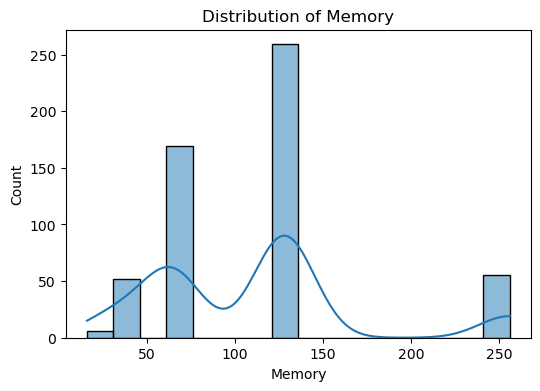

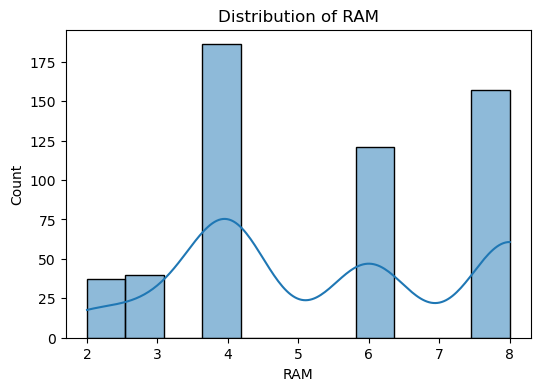

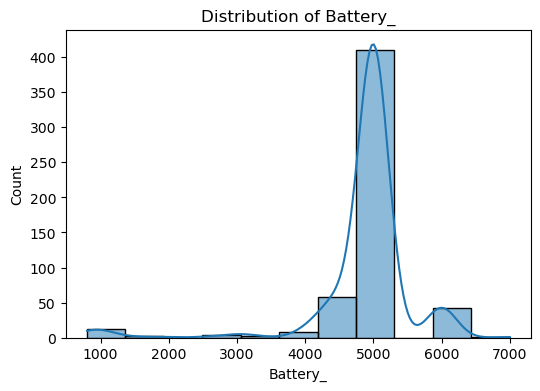

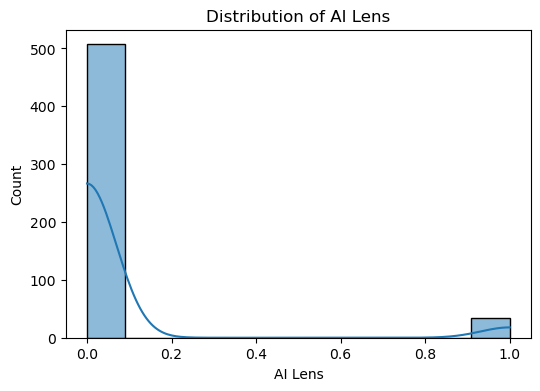

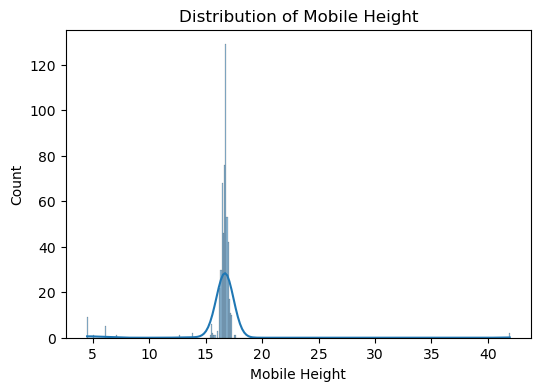

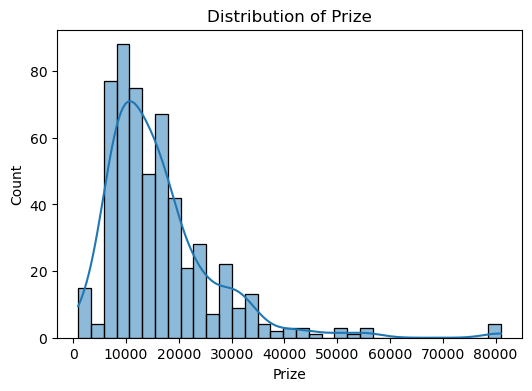

In [10]:
# Distribution plots

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

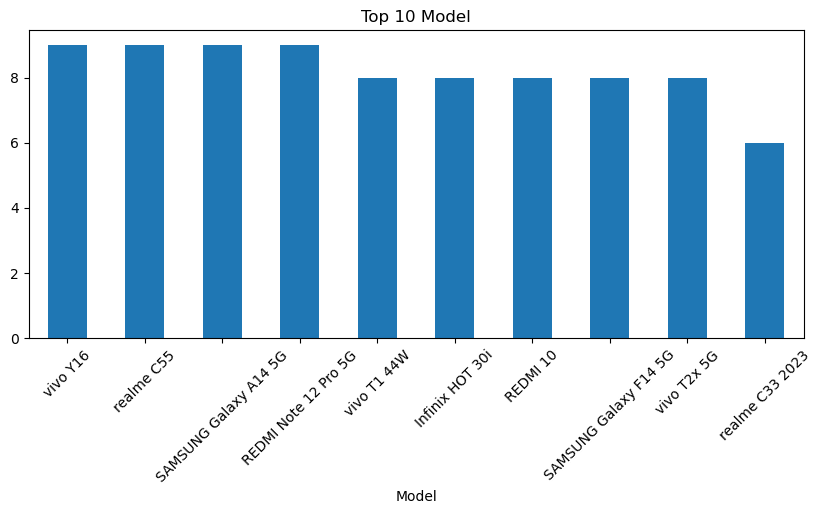

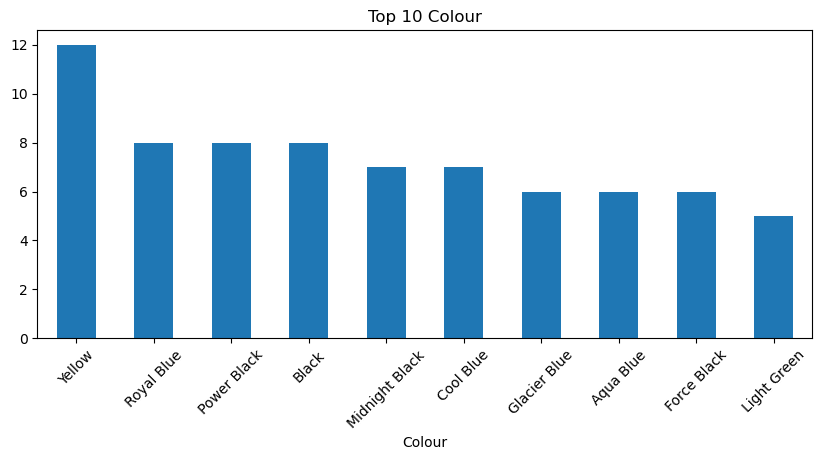

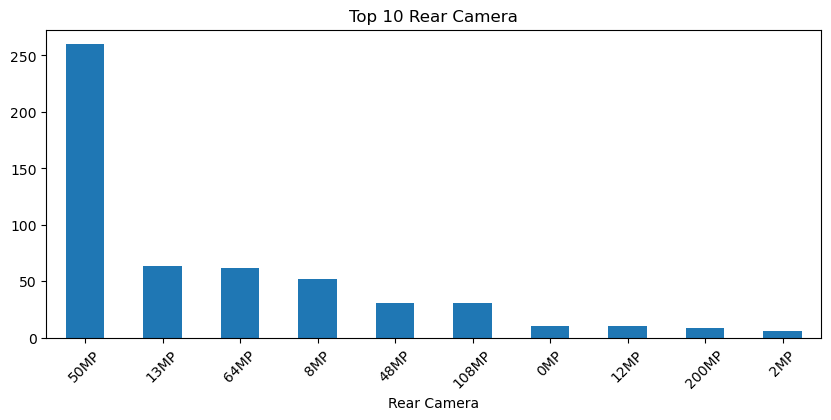

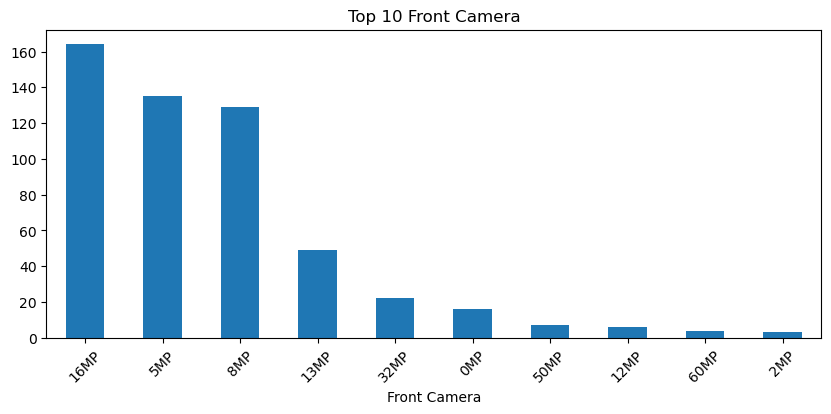

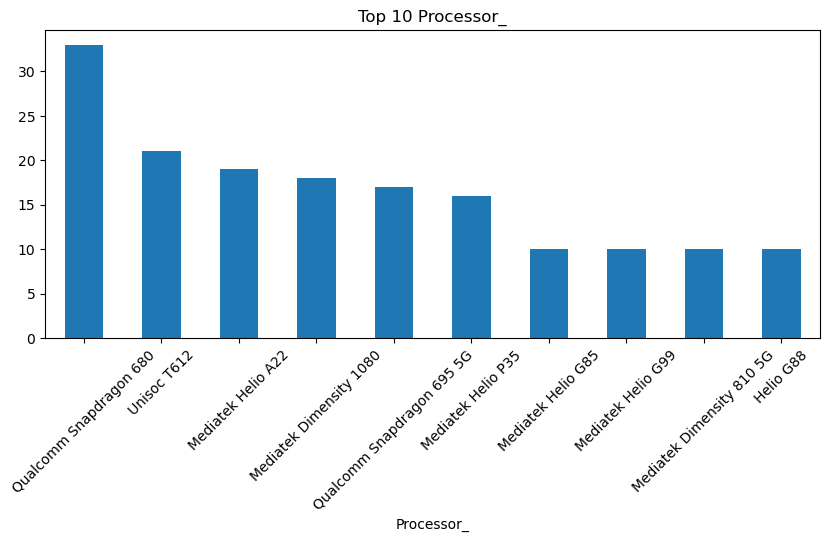

In [11]:
# Categorical plots

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.xticks(rotation=45)
    plt.show()

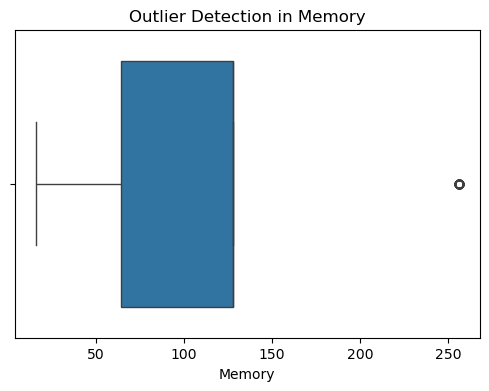

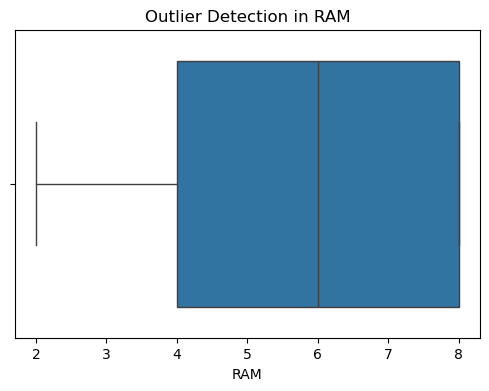

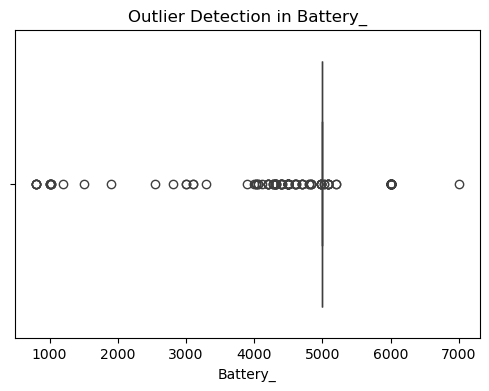

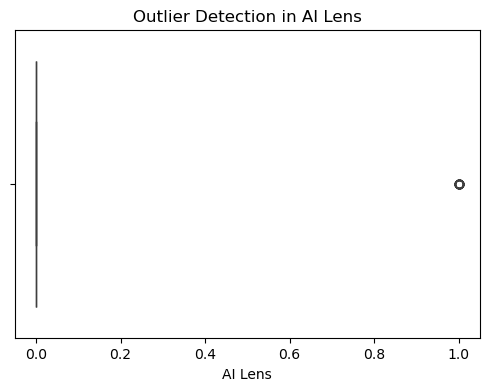

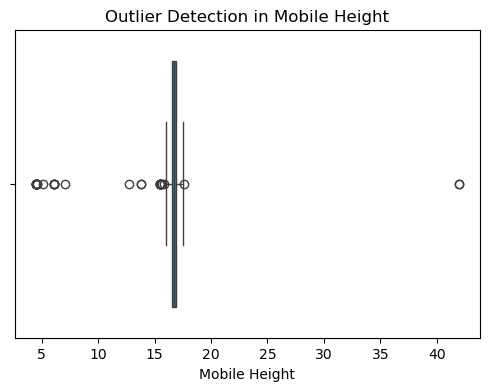

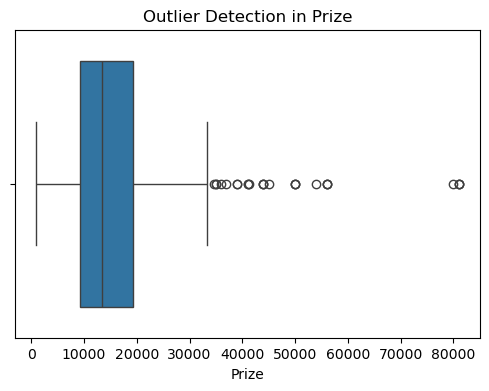

In [12]:
# Box plots for outliers
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection in {col}')
    plt.show()

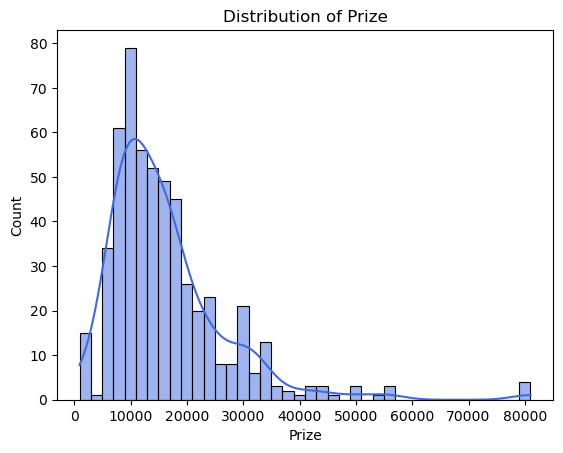

In [13]:
# 6) TARGET DETECTION & DISTRIBUTION

plt.figure()
sns.histplot(df['Prize'], bins=40, kde=True, color='royalblue')
plt.title(f"Distribution of {'Prize'}")
plt.show()

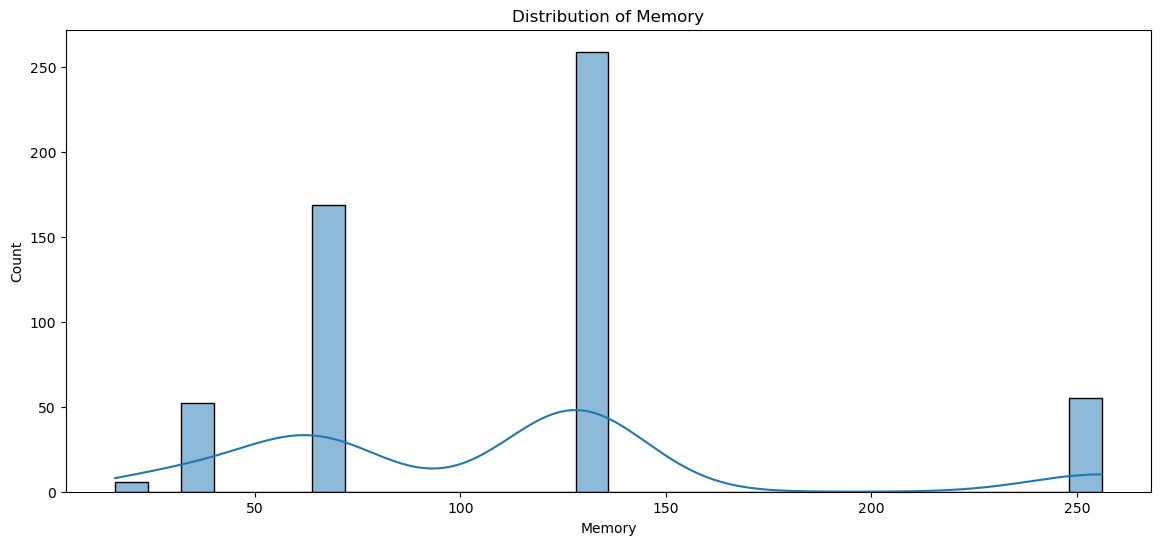

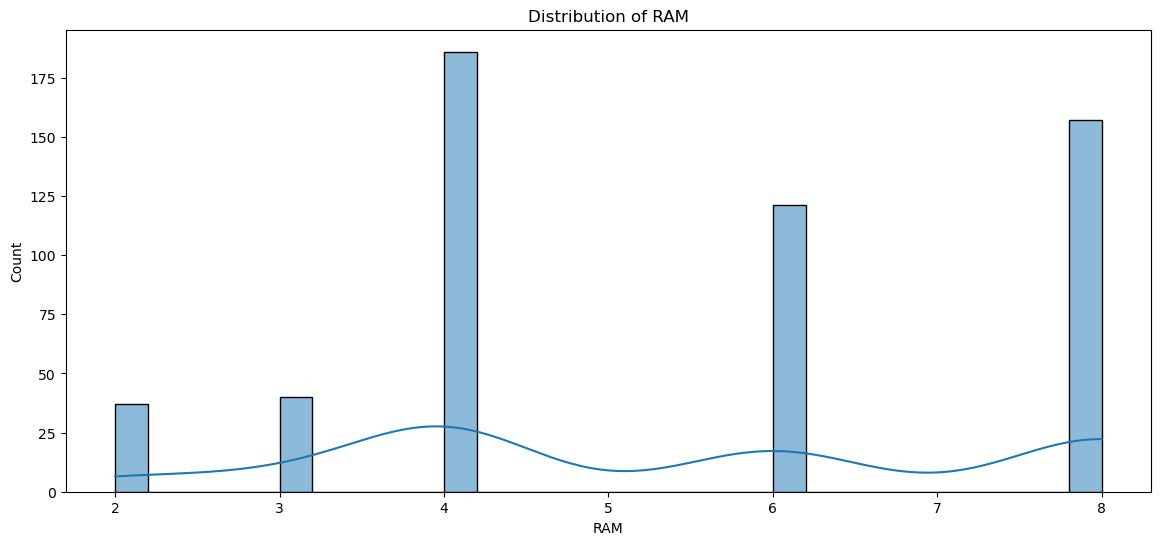

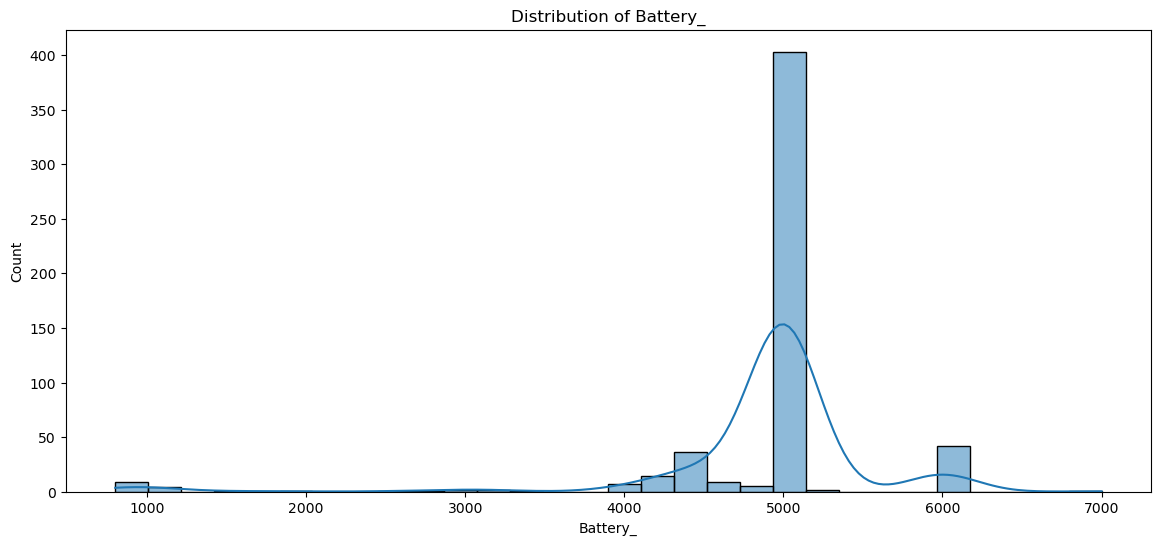

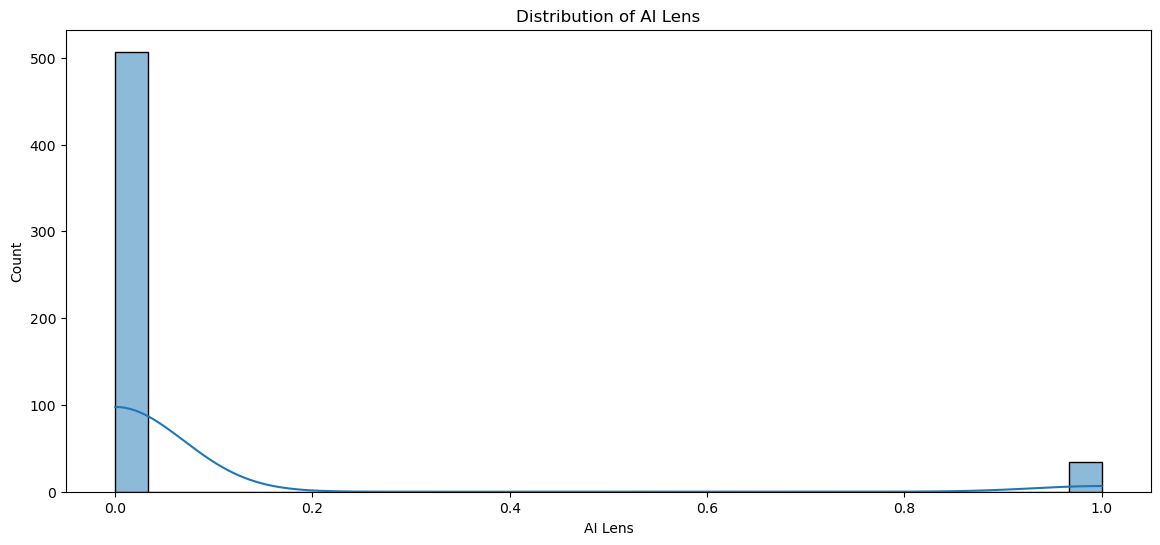

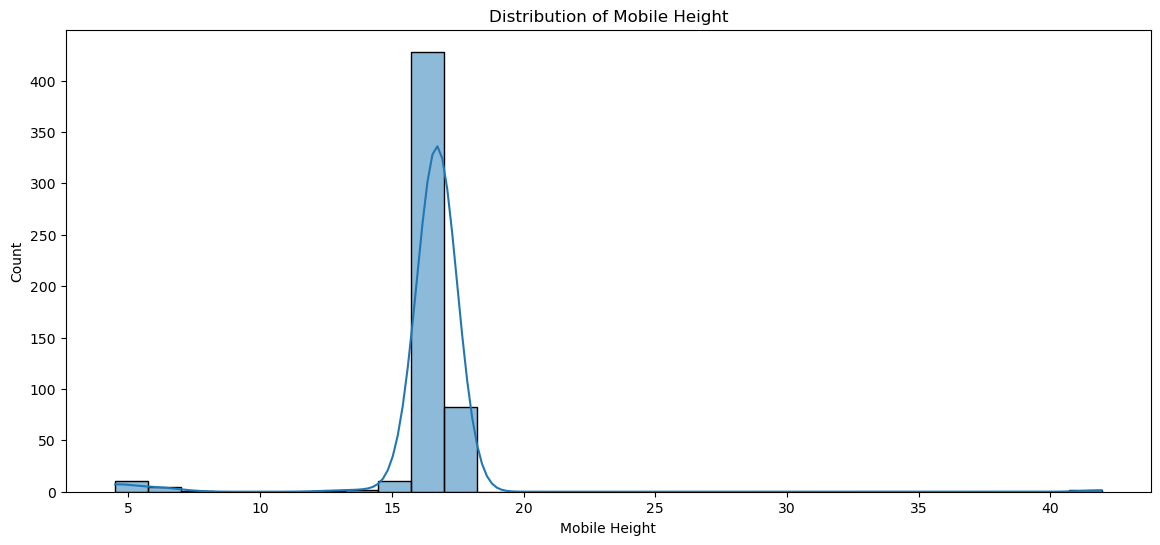

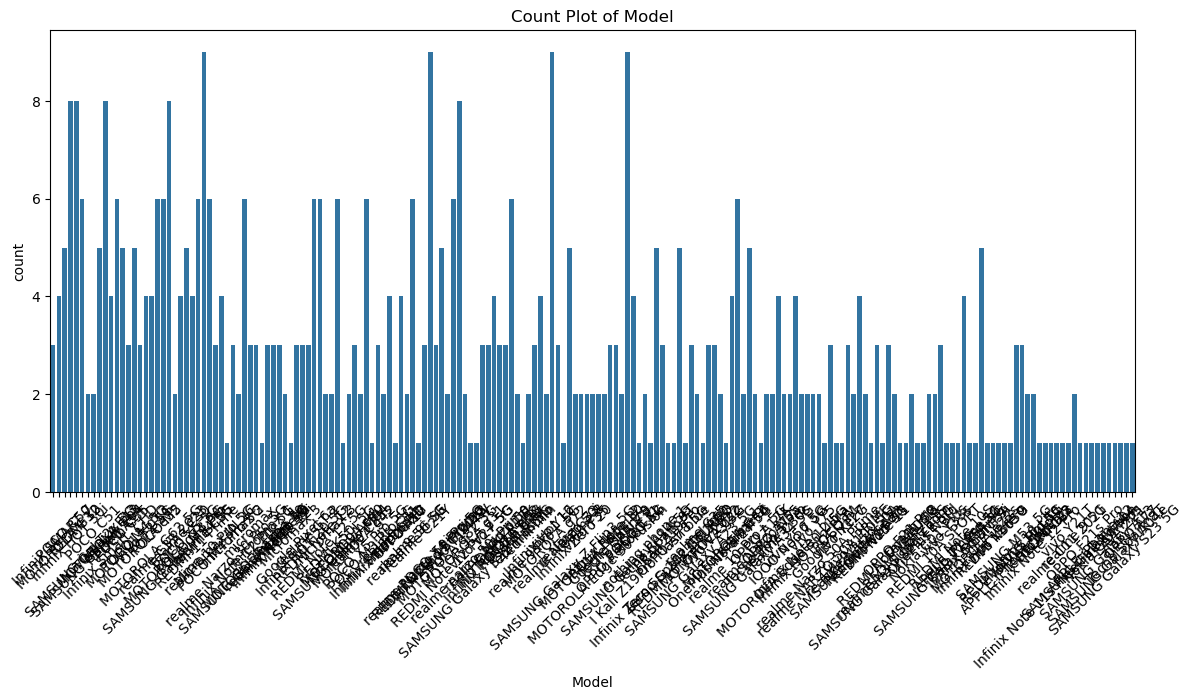

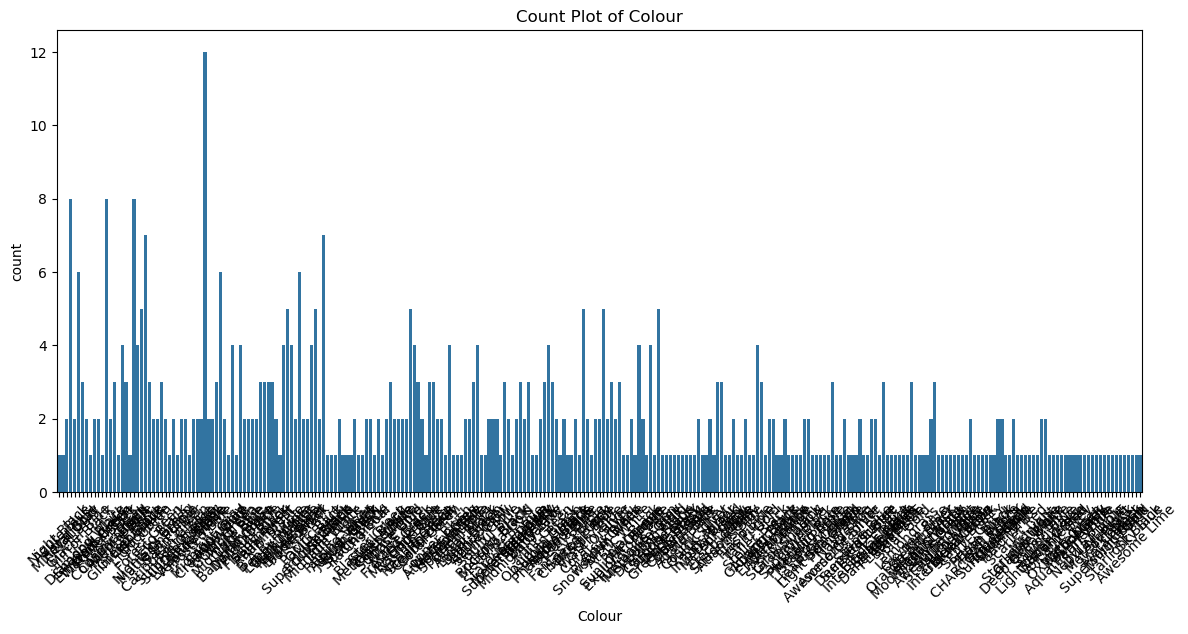

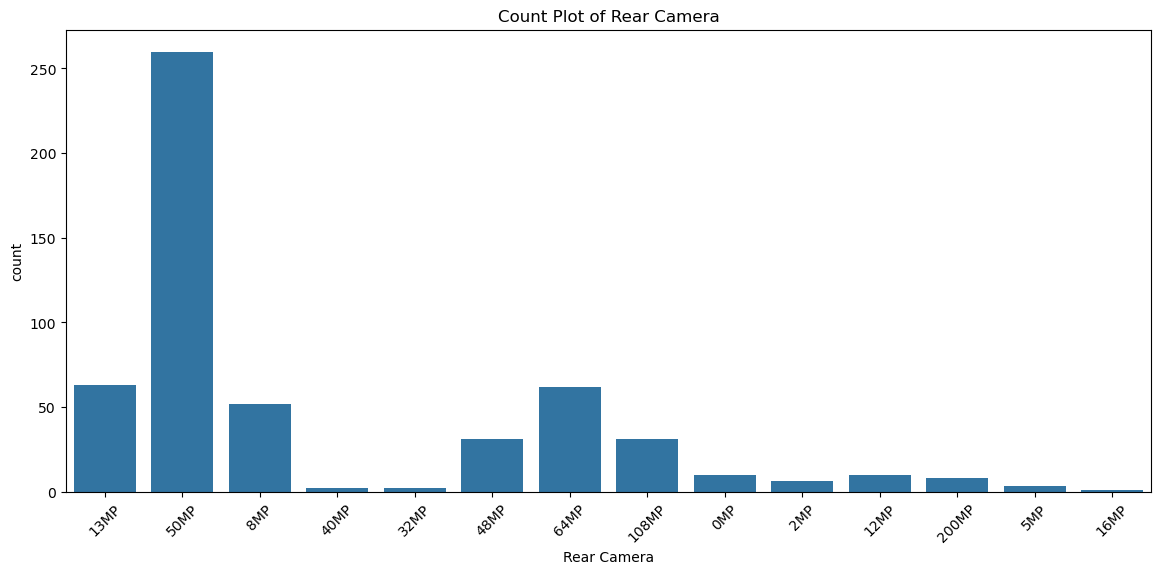

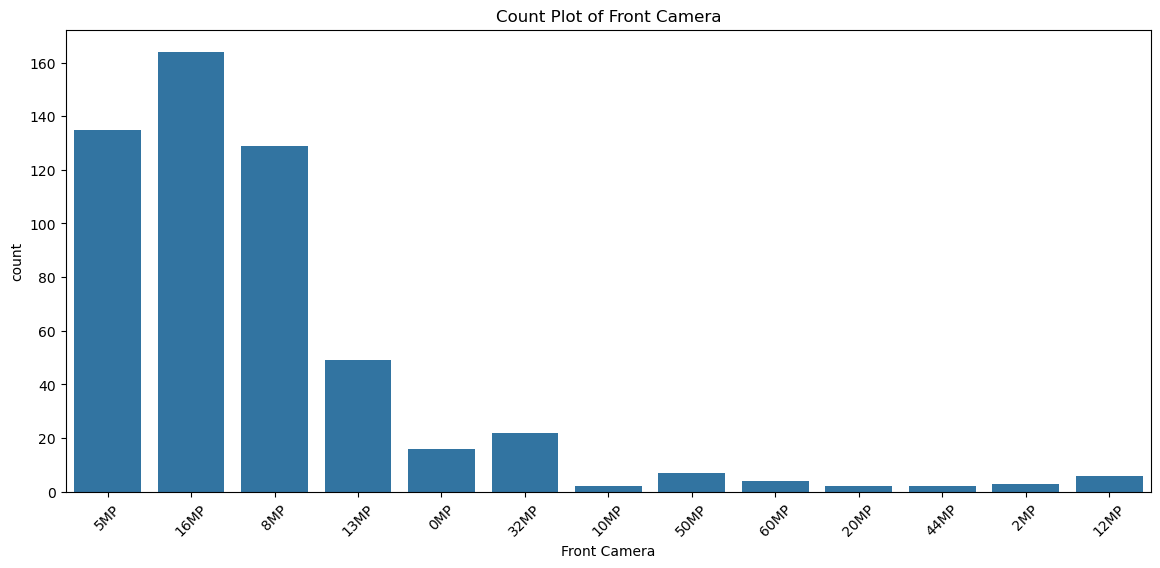

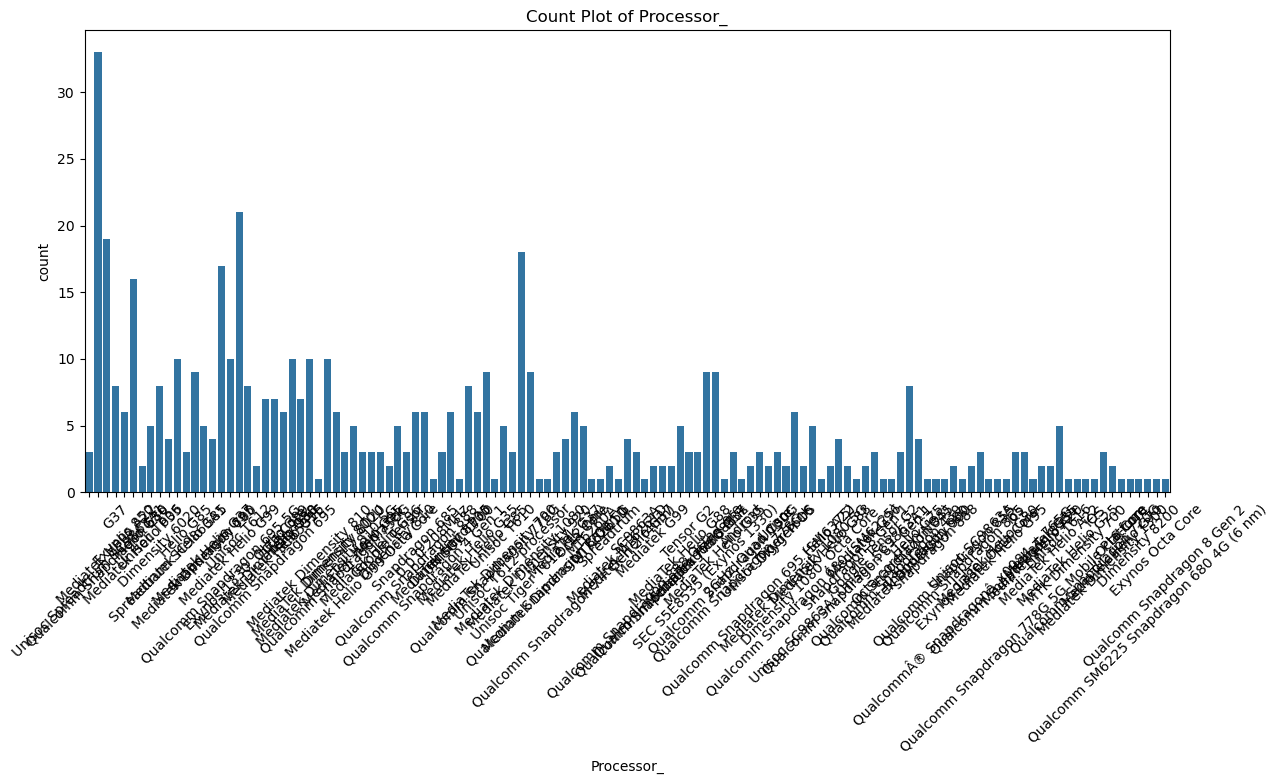

In [14]:
# 7) UNIVARIATE ANALYSIS

# Numeric distributions
for col in num_cols:
    if col != 'Prize':
        plt.figure(figsize=(14,6))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

# Categorical top counts
for col in cat_cols:
    plt.figure(figsize=(14,6))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

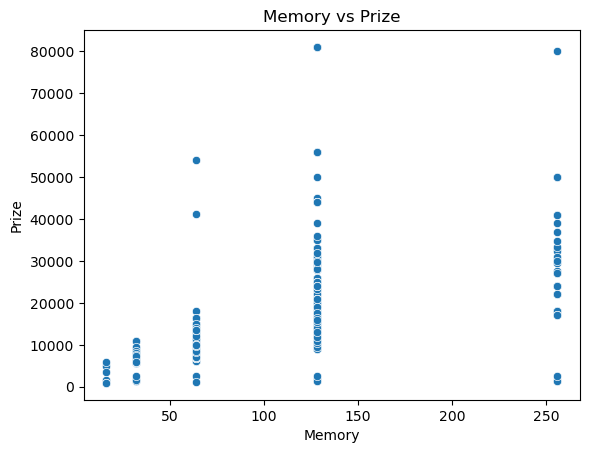

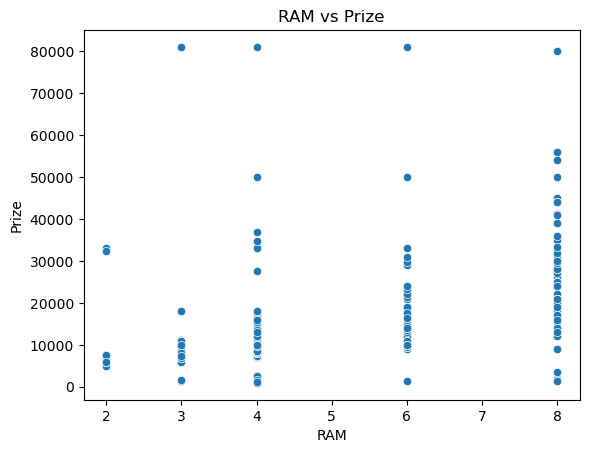

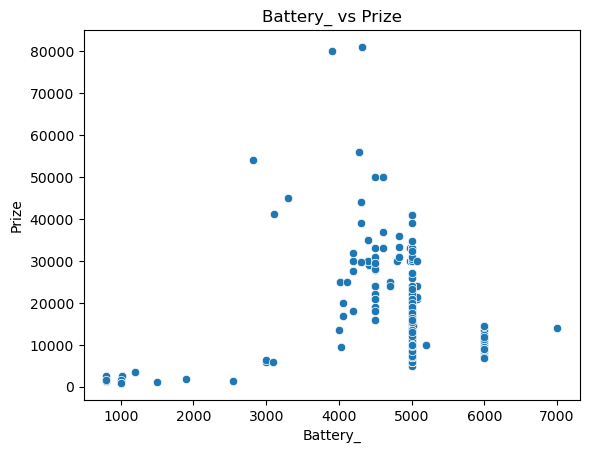

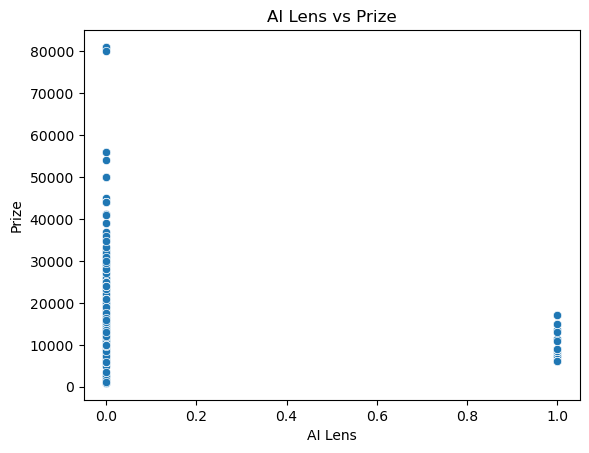

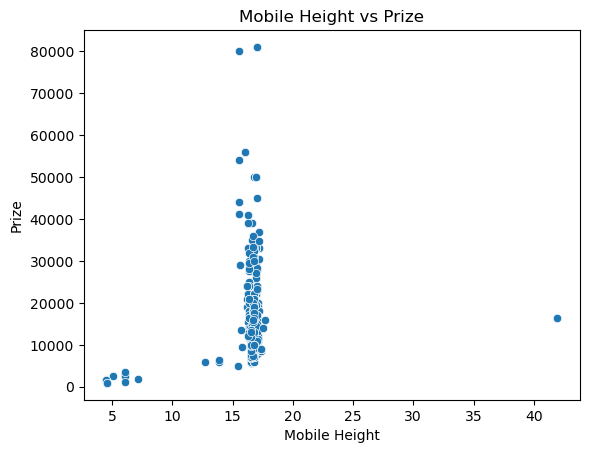

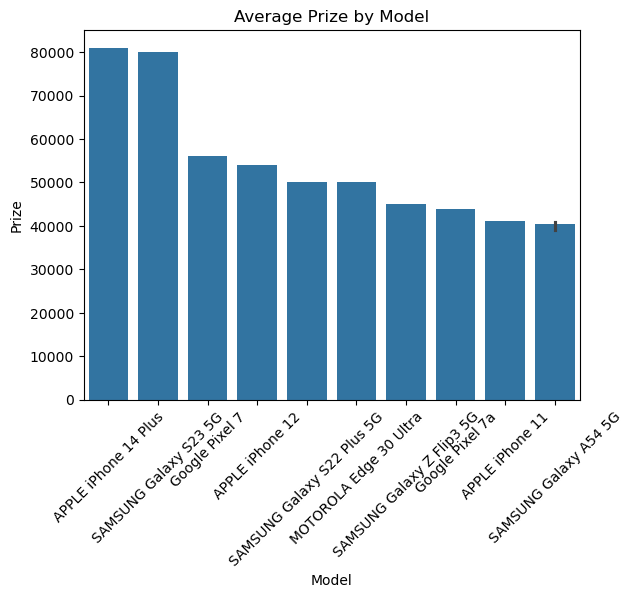

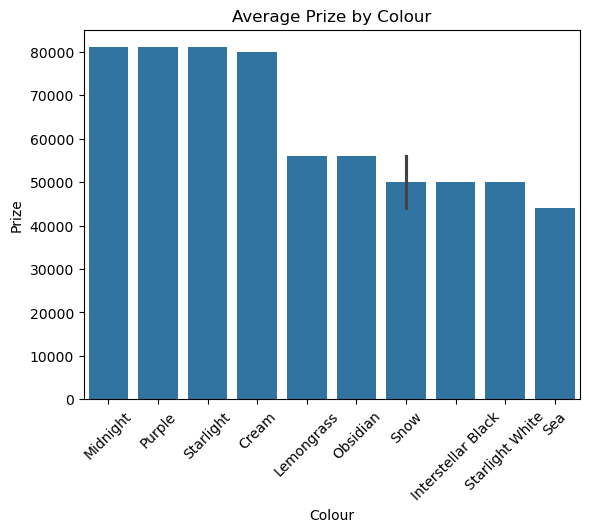

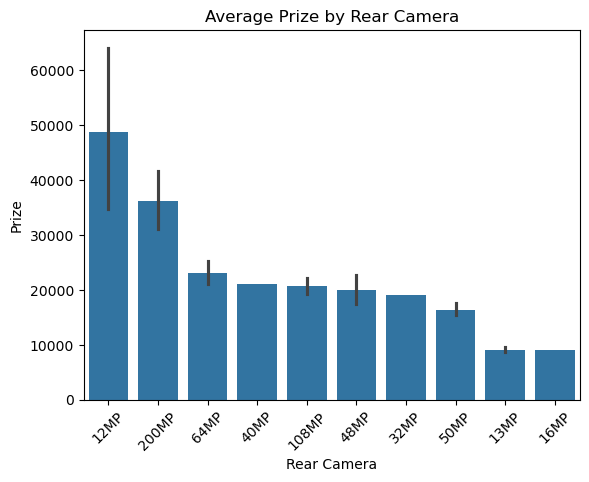

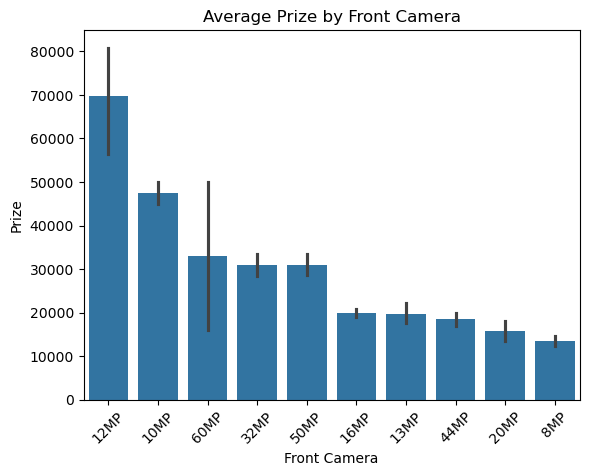

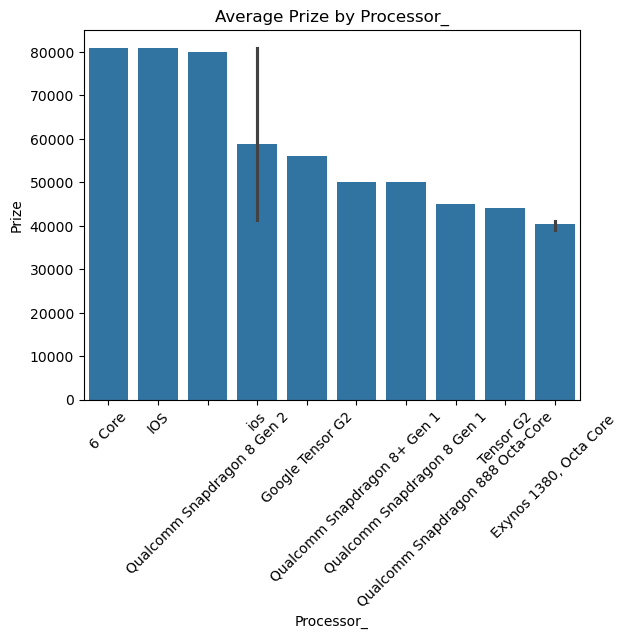

In [15]:
# 8) BIVARIATE ANALYSIS

for col in [x for x in num_cols if x != 'Prize']:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['Prize'])
    plt.title(f"{col} vs {'Prize'}")
    plt.show()

for col in cat_cols:
    plt.figure()
    order = df.groupby(col)['Prize'].mean().sort_values(ascending=False).index[:10]
    sns.barplot(x=col, y='Prize', data=df, order=order)
    plt.xticks(rotation=45)
    plt.title(f"Average {'Prize'} by {col}")
    plt.show()


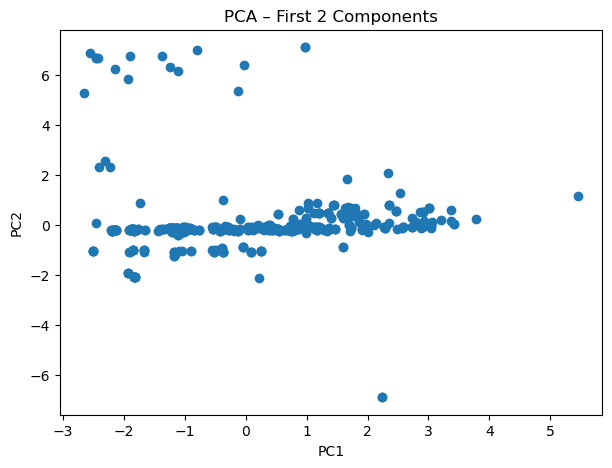

In [16]:
# 9) MULTIVARIATE ANALYSIS (PCA )

num_data = df[num_cols]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(7,5))
plt.scatter(pca_result[:,0], pca_result[:,1])
plt.title("PCA – First 2 Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

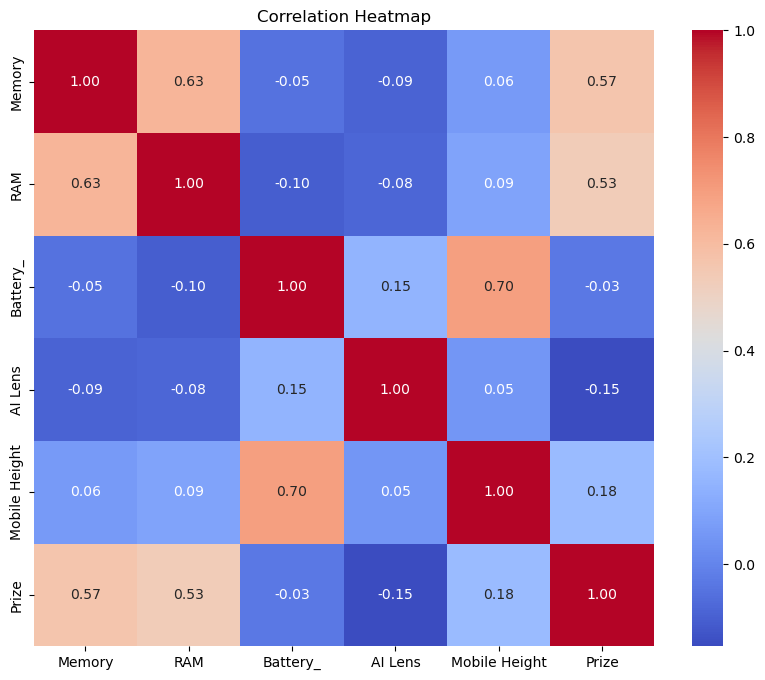

In [17]:
# 10) CORRELATION HEATMAP

corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

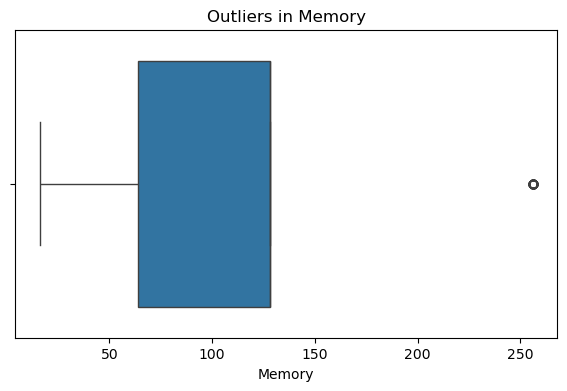

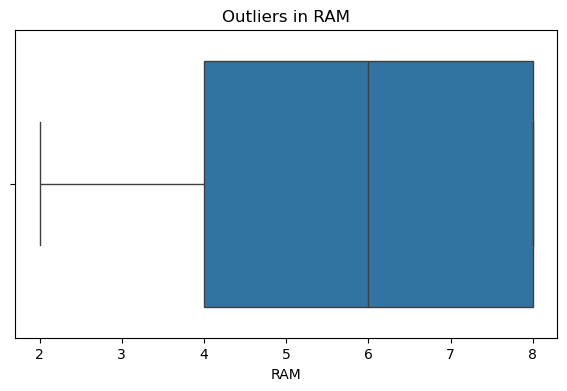

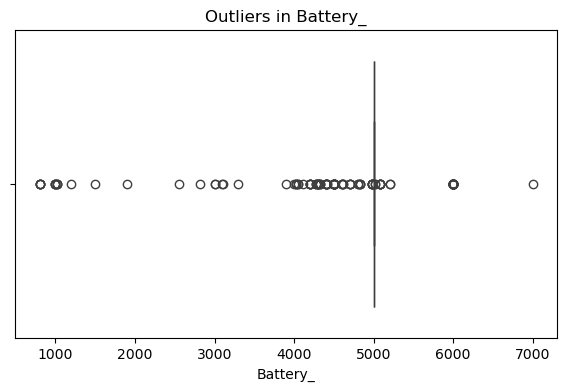

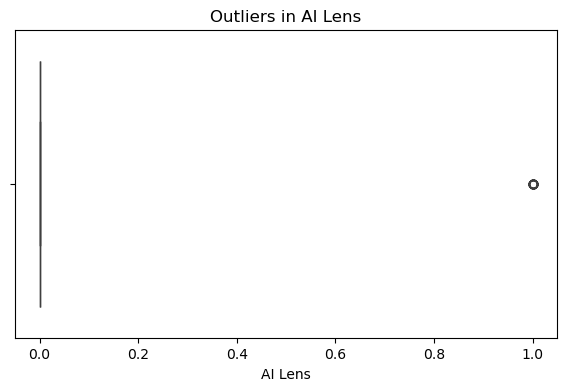

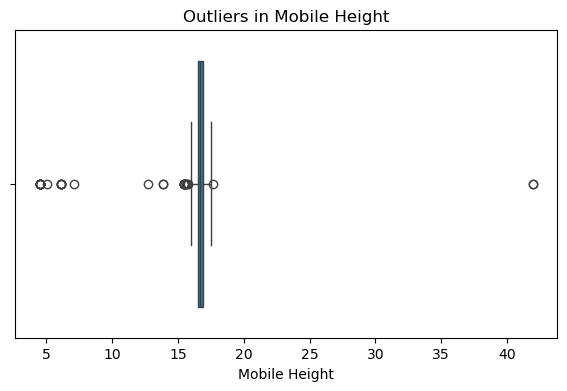

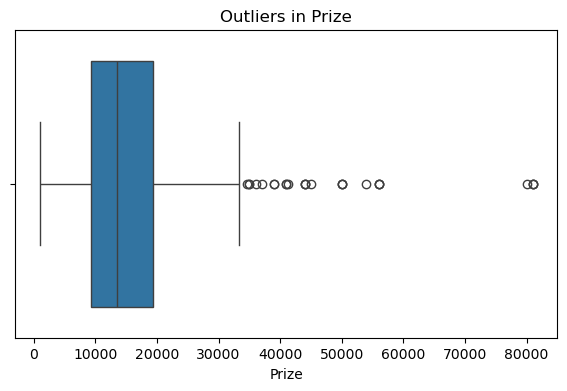


Outliers detected per column:
 {'Memory': 55, 'RAM': 0, 'Battery_': 152, 'AI Lens': 34, 'Mobile Height': 33, 'Prize': 25}


In [18]:
# 11) OUTLIER DETECTION

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# IQR Method
outlier_info = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    outlier_info[col] = outliers.shape[0]

print("\nOutliers detected per column:\n", outlier_info)

In [19]:
# 12) PREPROCESSING & FEATURE ENGINEERING

df_proc = df.copy()

# Fill missing values
for col in df_proc.select_dtypes(include=[np.number]):
    df_proc[col] = df_proc[col].fillna(df_proc[col].median())
for c in df_proc.select_dtypes(include=['object']):
    df_proc[col] = df_proc[col].fillna("Missing")

# Extract MP from camera columns
def extract_mp(x):
    if isinstance(x, str):
        m = re.search(r'(\d+)', x)
        if m: return int(m.group(1))
    return np.nan

for col in ['Rear Camera','Front Camera']:
    if col in df_proc.columns:
        df_proc[col + '_MP'] = df_proc[col].apply(extract_mp).fillna(0).astype(int)
        df_proc.drop(columns=[col], inplace=True, errors='ignore')

# Extract numeric camera values
df['Rear_MP'] = df['Rear Camera'].str.replace('MP', '').astype(float)
df['Front_MP'] = df['Front Camera'].str.replace('MP', '').astype(float)

# New features
df['Camera_Score'] = df['Rear_MP'] + df['Front_MP']
df['Performance_Index'] = df['RAM'] * df['Memory'] * df['Battery_']
df['Size_Battery_Ratio'] = df['Battery_'] / df['Mobile Height']

print("Feature engineering done. Columns now:", df_proc.columns.tolist())

Feature engineering done. Columns now: ['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize', 'Rear Camera_MP', 'Front Camera_MP']


In [20]:
# 13) ENCODING (FREQUENCY + ONE-HOT)

X = df_proc.drop(columns=['Prize'])
y = df_proc['Prize']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

X_enc = X.copy()
freq_cols, ohe_cols = [], []

for col in cat_cols:
    if X[col].nunique() > 30:
        freq = X[col].value_counts(normalize=True)
        X_enc[col+'_freqenc'] = X[col].map(freq).fillna(0)
        X_enc.drop(columns=[col], inplace=True)
        freq_cols.append(col)
    else:
        ohe_cols.append(col)

print("Frequency encoded:", freq_cols)
print("One-hot encoded:", ohe_cols)

if ohe_cols:
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first')
    ohe_fit = ohe.fit(X_enc[ohe_cols])
    ohe_arr = ohe_fit.transform(X_enc[ohe_cols])
    ohe_df = pd.DataFrame(ohe_arr, columns=ohe_fit.get_feature_names_out(ohe_cols))
    X_enc = pd.concat([X_enc.drop(columns=ohe_cols), ohe_df], axis=1)

print("Final feature matrix shape:", X_enc.shape)


Frequency encoded: ['Model', 'Colour', 'Processor_']
One-hot encoded: []
Final feature matrix shape: (541, 10)


In [21]:
# 14) SPLIT DATA

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.2, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (432, 10) Test: (109, 10)


In [22]:
# 15) MODEL TRAINING

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2, "model": model}
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.3f}")


LinearRegression: MAE=4085.46, RMSE=9121.35, R2=0.396
RandomForest: MAE=1608.20, RMSE=4047.32, R2=0.881
GradientBoosting: MAE=1924.85, RMSE=4886.24, R2=0.827


Best model: RandomForest
Top 10 important features:


Front Camera_MP       0.485631
Battery_              0.150830
Memory                0.087047
RAM                   0.078871
Mobile Height         0.064124
Processor__freqenc    0.058464
Rear Camera_MP        0.033220
Model_freqenc         0.027675
Colour_freqenc        0.013824
AI Lens               0.000313
dtype: float64

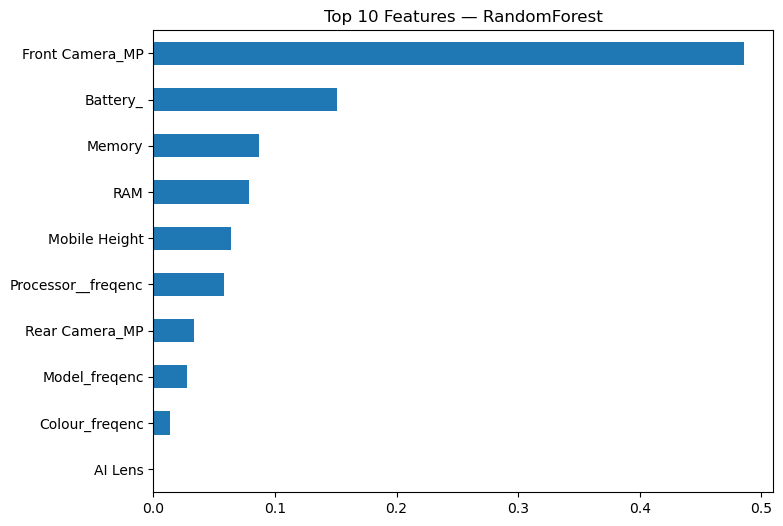

In [23]:
# 16) FEATURE IMPORTANCE

def feature_importance(model, features):
    if hasattr(model, "feature_importances_"):
        return pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    elif hasattr(model, "coef_"):
        return pd.Series(np.abs(model.coef_), index=features).sort_values(ascending=False)
    return pd.Series()

best_model_name = min(results, key=lambda k: results[k]["RMSE"])
best_model = results[best_model_name]["model"]
print("Best model:", best_model_name)

if hasattr(best_model, "feature_importances_") or hasattr(best_model, "coef_"):
    feat_imp = feature_importance(best_model, X_train.columns)
    print("Top 10 important features:")
    display(feat_imp.head(10))
    plt.figure(figsize=(8,6))
    feat_imp.head(10).iloc[::-1].plot(kind="barh")
    plt.title(f"Top 10 Features — {best_model_name}")
    plt.show()


In [24]:
# 17) SAVE OUTPUTS

OUTPUT_DIR = "outputs"
model_path = os.path.join(OUTPUT_DIR, f"best_model_{best_model_name}.pkl")
joblib.dump(best_model, model_path)
print("Model saved to:", model_path)

report_path = os.path.join(OUTPUT_DIR, "price_prediction_report.txt")
with open(report_path, "w") as f:
    f.write(f"Best model: {best_model_name}\n\n")
    for k, v in results.items():
        f.write(f"{k}: MAE={v['MAE']:.2f}, RMSE={v['RMSE']:.2f}, R2={v['R2']:.3f}\n")
    f.write("\nTop features:\n")
    f.write(str(feat_imp.head(20)))
print("Report saved to:", report_path)


Model saved to: outputs\best_model_RandomForest.pkl
Report saved to: outputs\price_prediction_report.txt


# Thank You

## Prepared by **Bhanwar Singh Rathore**